In [1]:
from tensorflow.keras.layers import Input,Dense,LSTM,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [4]:
!python3 -m pip install tensorflow-metal

In [5]:
df = pd.read_csv('GeneratedUSDCAD dbot.csv')
print(len(df))


99999


In [6]:
df.tail()

,Time,Open,Close,Tick Volume
99994,1707145200,1.34976,1.35078,1555
99995,1707147000,1.35077,1.35121,2090
99996,1707148800,1.35120,1.35027,1697
99997,1707150600,1.35027,1.35118,3439
99998,1707152400,1.35118,1.35380,4209


In [7]:
df = df['Close']
df.tail()

99994    1.35078
99995    1.35121
99996    1.35027
99997    1.35118
99998    1.35380
Name: Close, dtype: float64

In [8]:
series = df.values
series = series.reshape((len(series),1))
print(series)


[[1.45153]
 [1.45106]
 [1.45119]
 ...
 [1.35027]
 [1.35118]
 [1.3538 ]]


<function matplotlib.pyplot.show(close=None, block=None)>

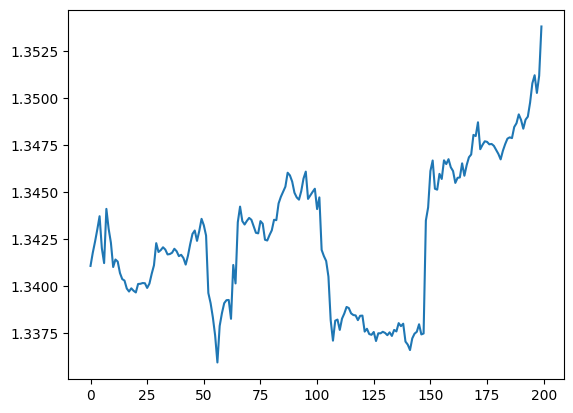

In [9]:
plt.plot(series[-200:])
plt.show

In [10]:
T = 6
x = []
y = []
n = 0
r_len = 0
for t in range(len(series)):
  if(t >= n):
    n += T
    if(n < len(series) and len(series[t : n]) == T and n + 1 < len(series)):
      x.append(series[t : n])
      n += 1
      y.append(series[n])
      #n += 1
    else:
      print("Maximum array is ",len(series)," cant continue to ",n, " or ", n + T)
      r_len = len(series) - (len(series) - n)
      print("remaining index is from ", r_len , " to ", len(series) - 1)
      break
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)



Maximum array is  99999  cant continue to  100001  or  100007
remaining index is from  100001  to  99998
(14285, 6, 1)
(14285, 1)


In [11]:
x_train = x[:-500]
y_train = y[:-500]

x_test = x[-500:]
y_test = y[-500:]


print(x_train.shape)
#print(x_val.shape)
#print(x_test.shape)

(13785, 6, 1)


In [12]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=50,         # Stop after 50 epochs with no improvement
    min_delta=0.001,     # Consider a change of 0.001 as significant
    verbose=1,           # Print a message when stopping
    mode='min',          # Minimize the monitored quantity
    baseline=None,        # Optional: reference value for the monitored quantity
    restore_best_weights=True  # Restore the best model weights when stopping
)

lr_reducer = ReduceLROnPlateau(monitor='val_loss',
                               factor=0.5,
                               patience=2,
                               verbose=1)

In [13]:
i = Input(shape = x_train[0].shape)

#X = LSTM(128, return_sequences=True)(i)
X = i
X = LSTM(64)(X)
X = Dense(32, activation="relu")(X)
X = Dense(32, activation="relu")(X)
X = Dense(1)(X)

model = Model(i, X)

model.compile(
    loss='mse',
    optimizer= 'Adam'
)



r = model.fit(
  x_train,y_train,
  epochs = 200,
  validation_split = 0.1,
  #validation_data = (x_test, y_test),
  callbacks=[lr_reducer]
)

2024-03-06 10:59:51.804235: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-06 10:59:51.804326: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-06 10:59:51.805288: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-06 10:59:51.806447: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-06 10:59:51.806938: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/200


2024-03-06 10:59:54.368334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 10:59:54.746348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 10:59:55.247574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


388/388 [==============================] - ETA: 0s - loss: 0.0390

2024-03-06 11:00:07.789543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 11:00:07.947656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


388/388 [==============================] - 17s 36ms/step - loss: 0.0390 - val_loss: 9.7631e-05 - lr: 0.0010
Epoch 2/200
388/388 [==============================] - 11s 28ms/step - loss: 8.5229e-05 - val_loss: 8.1185e-05 - lr: 0.0010
Epoch 3/200
387/388 [============================>.] - ETA: 0s - loss: 6.7294e-05
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
388/388 [==============================] - 12s 31ms/step - loss: 6.7247e-05 - val_loss: 7.2735e-05 - lr: 0.0010
Epoch 4/200
388/388 [==============================] - 15s 37ms/step - loss: 5.1638e-05 - val_loss: 5.4827e-05 - lr: 5.0000e-04
Epoch 5/200
388/388 [==============================] - ETA: 0s - loss: 4.1279e-05
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
388/388 [==============================] - 13s 32ms/step - loss: 4.1279e-05 - val_loss: 4.6504e-05 - lr: 5.0000e-04
Epoch 6/200
388/388 [==============================] - 12s 30ms/step - loss: 3.3047e-05 - val_lo

In [14]:
def r_squared(y_true, y_pred):
  """Calculates the R-squared score.

  Args:
    y_true: The ground truth values.
    y_pred: The predicted values.

  Returns:
    The R-squared score.
  """

  mean_y_true = np.mean(y_true)
  ss_tot = np.sum((y_true - mean_y_true)**2)
  ss_res = np.sum((y_true - y_pred)**2)
  r_squared = 1 - ss_res / ss_tot
  return r_squared

y_pred = model.predict(x_test)
#y_pred = y_pred.reshape(-1)
r_squared = r_squared(y_test, y_pred)

print(r_squared)

2024-03-06 12:06:05.642956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 12:06:05.880118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 15ms/step
0.9634745871595993


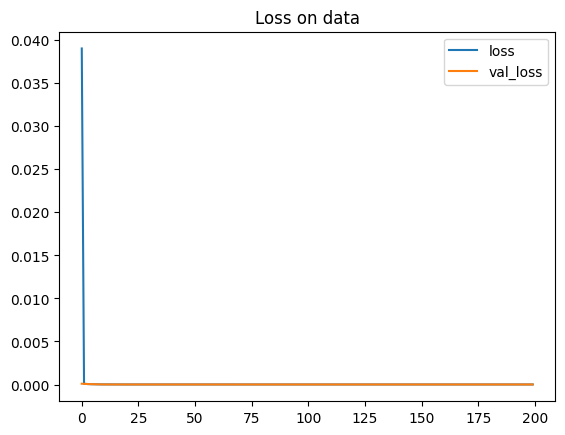

In [15]:
plt.title("Loss on data")
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20065 (78.38 KB)
Trainable params: 20065 (78.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
print(y_pred[-3:], "compared to ",y_test[-3:])

[[1.3451322]
 [1.3461026]
 [1.3473095]] compared to  [[1.3472 ]
 [1.34913]
 [1.35121]]


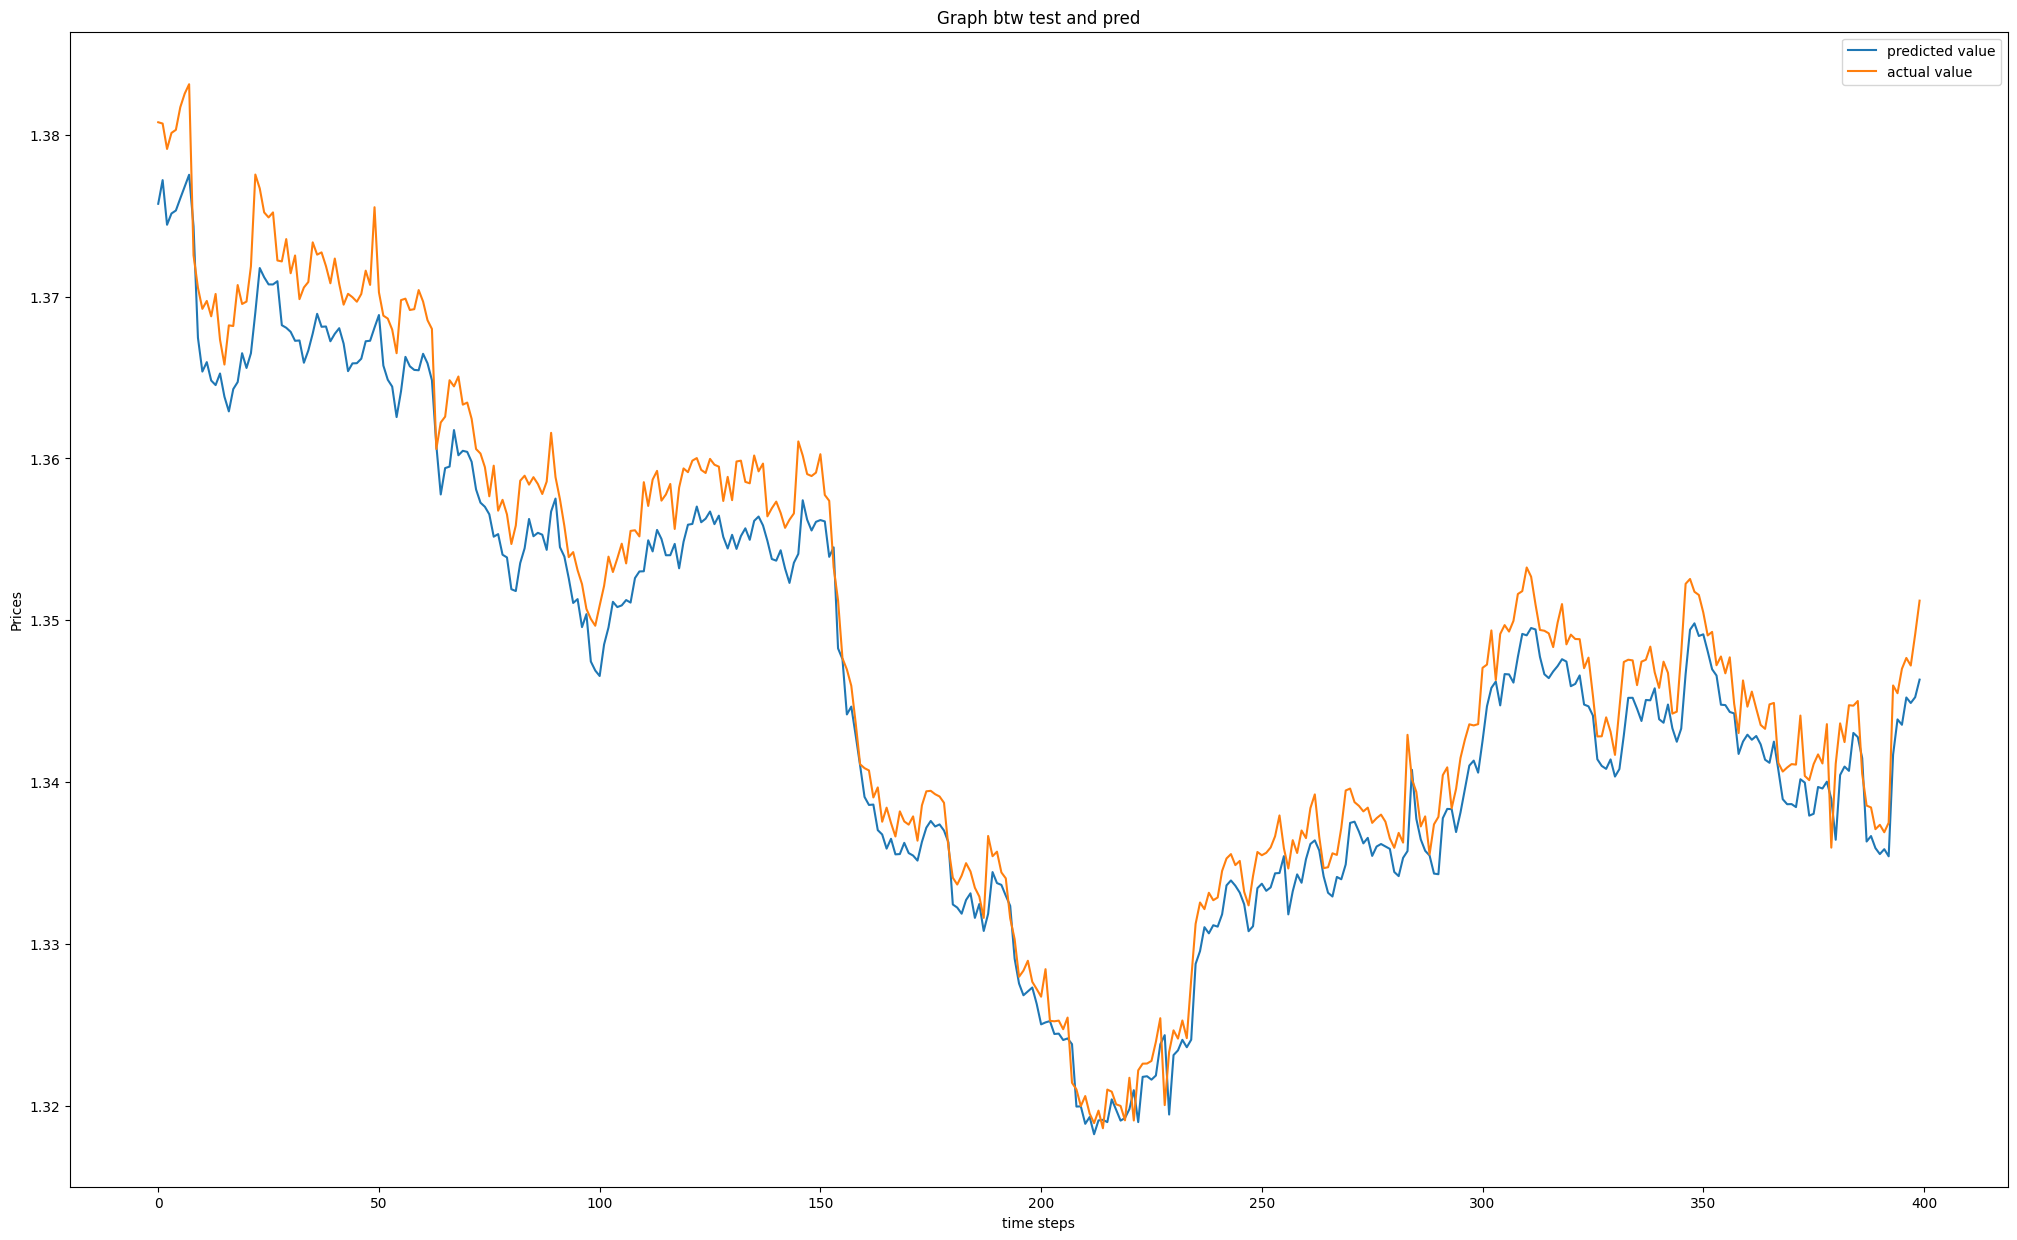

In [17]:
plt.figure(figsize=(25, 15))
plt.title("Graph btw test and pred")
plt.xlabel("time steps")
plt.ylabel("Prices")
plt.plot(y_pred[-400:], label= "predicted value")
plt.plot(y_test[-400:], label= "actual value")
plt.plot()
plt.legend()

In [17]:
print(x_test[-2:])
print(y_test[-2:])

[[[2065.94]
  [2067.85]
  [2067.04]
  [2066.21]]

 [[2070.33]
  [2064.79]
  [2059.29]
  [2065.39]]]
[[2070.33]
 [2065.76]]


In [18]:
print(series[-100:])

[[2085.74]
 [2084.84]
 [2085.76]
 [2085.64]
 [2086.07]
 [2077.43]
 [2077.33]
 [2074.82]
 [2076.92]
 [2078.06]
 [2077.18]
 [2077.36]
 [2075.41]
 [2074.85]
 [2076.45]
 [2076.61]
 [2072.91]
 [2075.16]
 [2078.85]
 [2079.69]
 [2077.18]
 [2075.46]
 [2074.14]
 [2075.47]
 [2074.76]
 [2073.69]
 [2072.68]
 [2069.34]
 [2068.02]
 [2068.35]
 [2066.37]
 [2066.24]
 [2065.63]
 [2066.43]
 [2066.75]
 [2067.39]
 [2066.84]
 [2069.39]
 [2070.68]
 [2069.47]
 [2068.62]
 [2068.33]
 [2069.43]
 [2069.07]
 [2069.94]
 [2070.52]
 [2072.19]
 [2072.33]
 [2072.72]
 [2073.17]
 [2071.85]
 [2071.86]
 [2068.71]
 [2068.28]
 [2065.52]
 [2062.41]
 [2064.7 ]
 [2065.58]
 [2067.69]
 [2067.26]
 [2065.34]
 [2065.33]
 [2064.59]
 [2065.1 ]
 [2063.62]
 [2063.31]
 [2065.46]
 [2068.46]
 [2066.53]
 [2066.69]
 [2067.78]
 [2069.71]
 [2069.62]
 [2069.45]
 [2069.59]
 [2071.43]
 [2074.4 ]
 [2075.85]
 [2074.14]
 [2075.2 ]
 [2073.1 ]
 [2072.59]
 [2073.24]
 [2074.62]
 [2076.98]
 [2074.58]
 [2075.93]
 [2074.95]
 [2069.19]
 [2065.94]
 [2067.85]

In [19]:
p_series = []

t_series = [[series[-100],series[-99],series[-98],series[-97]]]
print(type(t_series))
t_s = np.array(t_series)
print(t_s)
print(t_s.shape)
y_pred = model.predict(t_s)
print(y_pred)
p_series.append(y_pred[0])
print(t_series[0][1])
for i in range(100):
    t_series[0][0] = t_series[0][1]
    t_series[0][1] = t_series[0][2]
    t_series[0][2] = t_series[0][3]
    t_series[0][3] = y_pred[0]
    t_s = np.array(t_series)
    print(t_s.shape)
    y_pred = model.predict(t_s)
    print(y_pred)
    p_series.append(y_pred[0])

p_series = np.array(p_series)
print(p_series.shape)


<class 'list'>
[[[2085.74]
  [2084.84]
  [2085.76]
  [2085.64]]]
(1, 4, 1)
1/1 [==============================] - 0s 149ms/step
[[1998.8401]]
[2084.84]
(1, 4, 1)
1/1 [==============================] - 0s 41ms/step
[[1939.7747]]
(1, 4, 1)
1/1 [==============================] - 0s 40ms/step
[[1902.426]]
(1, 4, 1)
1/1 [==============================] - 0s 41ms/step
[[1877.6561]]
(1, 4, 1)
1/1 [==============================] - 0s 40ms/step
[[1860.2716]]
(1, 4, 1)
1/1 [==============================] - 0s 42ms/step
[[1847.5004]]
(1, 4, 1)
1/1 [==============================] - 0s 44ms/step
[[1837.8054]]
(1, 4, 1)
1/1 [==============================] - 0s 39ms/step
[[1830.2731]]
(1, 4, 1)
1/1 [==============================] - 0s 42ms/step
[[1824.3201]]
(1, 4, 1)
1/1 [==============================] - 0s 41ms/step
[[1819.5533]]
(1, 4, 1)
1/1 [==============================] - 0s 33ms/step
[[1815.6975]]
(1, 4, 1)
1/1 [==============================] - 0s 32ms/step
[[1812.553]]
(1, 4, 1)
1/1 

In [20]:
print(p_series)

[[1998.8401]
 [1939.7747]
 [1902.426 ]
 [1877.6561]
 [1860.2716]
 [1847.5004]
 [1837.8054]
 [1830.2731]
 [1824.3201]
 [1819.5533]
 [1815.6975]
 [1812.553 ]
 [1809.9717]
 [1807.8413]
 [1806.0757]
 [1804.6072]
 [1803.382 ]
 [1802.3574]
 [1801.4989]
 [1800.7782]
 [1800.1724]
 [1799.6624]
 [1799.2327]
 [1798.8702]
 [1798.5645]
 [1798.3064]
 [1798.0886]
 [1797.9047]
 [1797.7491]
 [1797.6174]
 [1797.5063]
 [1797.4125]
 [1797.333 ]
 [1797.2657]
 [1797.2085]
 [1797.1602]
 [1797.1191]
 [1797.0845]
 [1797.0549]
 [1797.0302]
 [1797.0092]
 [1796.9916]
 [1796.9766]
 [1796.9635]
 [1796.9525]
 [1796.9432]
 [1796.9353]
 [1796.9287]
 [1796.9235]
 [1796.9187]
 [1796.9148]
 [1796.9115]
 [1796.9087]
 [1796.9062]
 [1796.9043]
 [1796.9027]
 [1796.9012]
 [1796.9001]
 [1796.8992]
 [1796.8982]
 [1796.8971]
 [1796.8962]
 [1796.8955]
 [1796.895 ]
 [1796.8944]
 [1796.8943]
 [1796.8943]
 [1796.8943]
 [1796.8943]
 [1796.8943]
 [1796.8943]
 [1796.8943]
 [1796.8943]
 [1796.8943]
 [1796.8943]
 [1796.8943]
 [1796.8943]